用scikit-learn学习主成分分析(PCA)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
from sklearn.datasets import make_blobs

/Users/ruanhe/Library/Python/3.8/lib/python/site-packages/matplotlib/collections.py:1003: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


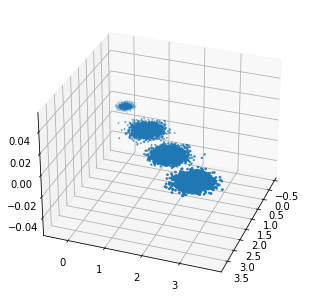

In [2]:
# X为样本特征，y为样本类别，共1000个样本，每个样本3个特征，共4个类别
X, y = make_blobs(n_samples=10000, n_features=3, centers=[[3,3,3], [0,0,0], [1,1,1], [2,2,2]], cluster_std=[0.2, 0.1, 0.2, 0.2], random_state =9)
fig = plt.figure()
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=30, azim=20, auto_add_to_figure=False)
fig.add_axes(ax) 
plt.scatter(X[:, 0], X[:, 1], X[:, 2],marker='o')

## n_components
指定希望PCA降维后的特征维度数目:
- 最常用的做法是直接指定降维到的维度数目，此时n_components是一个大于等于1的整数。
- 也可指定主成分的方差和所占的最小比例阈值，让PCA类自己去根据样本特征方差来决定降维到的维度数，此时n_components的值在（0，1]之间

In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(X)
print (pca.explained_variance_ratio_)
print (pca.explained_variance_)

[0.98318212 0.00850037 0.00831751]
[3.78521638 0.03272613 0.03202212]


In [4]:
pca = PCA(n_components=2)
pca.fit(X)
print (pca.explained_variance_ratio_)
print (pca.explained_variance_)

[0.98318212 0.00850037]
[3.78521638 0.03272613]


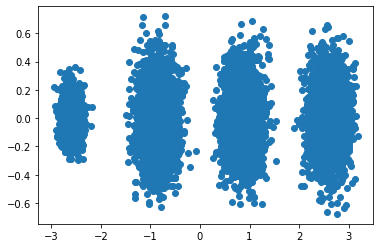

In [5]:
X_new = pca.transform(X)
plt.scatter(X_new[:, 0], X_new[:, 1],marker='o')
plt.show()

现在看看不直接指定降维的维度，而指定降维后的主成分方差和比例。

In [6]:
pca = PCA(n_components=0.95)
pca.fit(X)
print (pca.explained_variance_ratio_)
print (pca.explained_variance_)
print (pca.n_components_)

[0.98318212]
[3.78521638]
1


In [7]:
pca = PCA(n_components=0.99)
pca.fit(X)
print (pca.explained_variance_ratio_)
print (pca.explained_variance_)
print (pca.n_components_)

[0.98318212 0.00850037]
[3.78521638 0.03272613]
2


In [8]:
pca = PCA(n_components='mle', svd_solver='full')
pca.fit(X)
print (pca.explained_variance_ratio_)
print (pca.explained_variance_)
print (pca.n_components_)

[0.98318212]
[3.78521638]
1
